In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [19]:
# Declare the input and output variables
demanda = ctrl.Antecedent(np.arange(5, 51, 1), 'demanda')
tiempo_reabastecimiento = ctrl.Antecedent(np.arange(8, 73, 1), 'tiempo_reabastecimiento')
stock = ctrl.Antecedent(np.arange(70, 201, 1), 'stock')

materia_prima = ctrl.Consequent(np.arange(300, 901, 1), 'materia_prima')

## **Antecedentes**

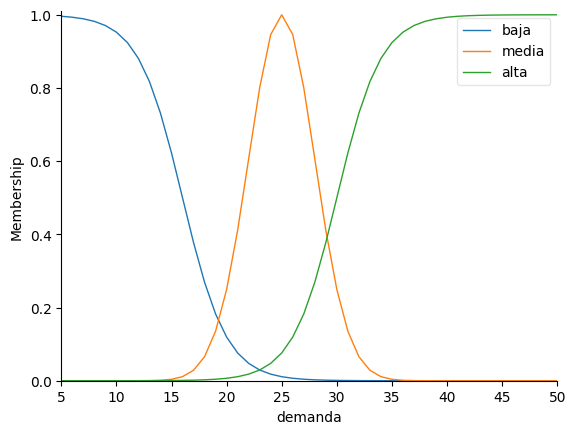

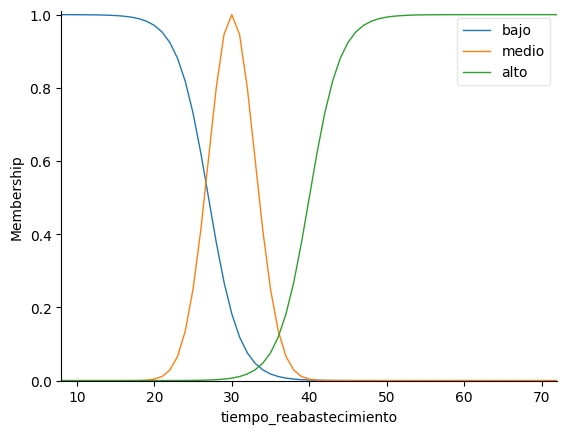

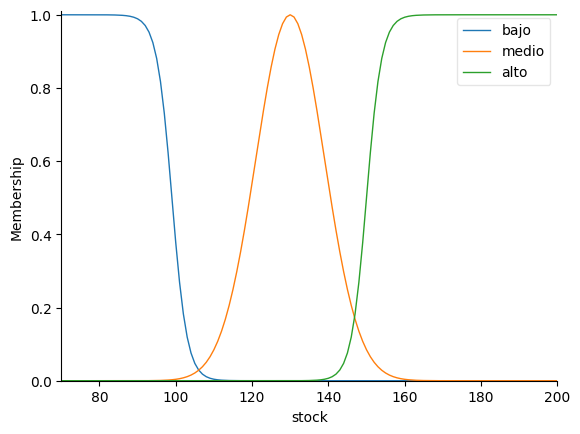

In [20]:
# Demanda
demanda['baja'] = fuzz.sigmf(demanda.universe, 16, -0.5)
demanda['media'] = fuzz.gaussmf(demanda.universe, 25, 3)
demanda['alta'] = fuzz.sigmf(demanda.universe, 30, 0.5)
demanda.view()
plt.show()

# Tiempo de Reabastecimiento
tiempo_reabastecimiento['bajo'] = fuzz.sigmf(tiempo_reabastecimiento.universe, 27, -0.5)
tiempo_reabastecimiento['medio'] = fuzz.gaussmf(tiempo_reabastecimiento.universe, 30, 3)
tiempo_reabastecimiento['alto'] = fuzz.sigmf(tiempo_reabastecimiento.universe, 40, 0.5)
tiempo_reabastecimiento.view()
plt.show()

# Stock
stock['bajo'] = fuzz.sigmf(stock.universe, 99, -0.5)
stock['medio'] = fuzz.gaussmf(stock.universe, 130, 9)
stock['alto'] = fuzz.sigmf(stock.universe, 150, 0.5)
stock.view()
plt.show()

## **Consecuentes (materia prima)**

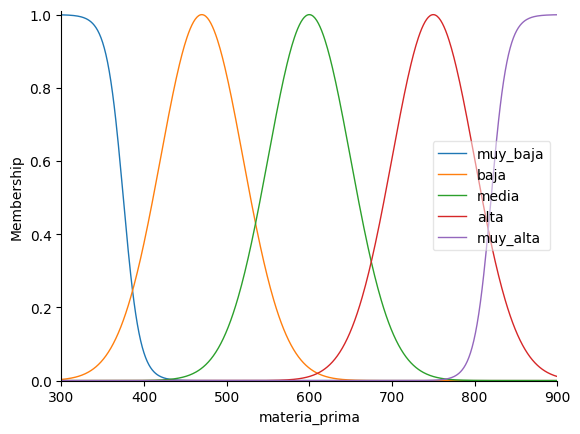

In [25]:
materia_prima['muy_baja'] = fuzz.sigmf(materia_prima.universe, 375, -0.1)
materia_prima['baja'] = fuzz.gaussmf(materia_prima.universe, 470, 50)
materia_prima['media'] = fuzz.gaussmf(materia_prima.universe, 600, 50)
materia_prima['alta'] = fuzz.gaussmf(materia_prima.universe, 750, 50)
materia_prima['muy_alta'] = fuzz.sigmf(materia_prima.universe, 820, 0.1)

materia_prima.view()
plt.show()

## **Reglas de inferencia**

In [22]:
regla1 = ctrl.Rule((demanda['baja'] | stock['bajo']) & tiempo_reabastecimiento['bajo'], materia_prima['muy_baja'])
regla2 = ctrl.Rule((demanda['baja'] | stock['bajo']) & tiempo_reabastecimiento['medio'], materia_prima['baja'])
regla3 = ctrl.Rule((demanda['baja'] | stock['bajo']) & tiempo_reabastecimiento['alto'], materia_prima['media'])
regla4 = ctrl.Rule((demanda['baja'] | stock['medio']) & tiempo_reabastecimiento['bajo'], materia_prima['baja'])
regla5 = ctrl.Rule((demanda['baja'] | stock['medio']) & tiempo_reabastecimiento['medio'], materia_prima['media'])
regla6 = ctrl.Rule((demanda['baja'] | stock['medio']) & tiempo_reabastecimiento['alto'], materia_prima['alta'])
regla7 = ctrl.Rule((demanda['baja'] | stock['alto']) & tiempo_reabastecimiento['bajo'], materia_prima['media'])
regla8 = ctrl.Rule((demanda['baja'] | stock['alto']) & tiempo_reabastecimiento['medio'], materia_prima['alta'])
regla9 = ctrl.Rule((demanda['baja'] | stock['alto']) & tiempo_reabastecimiento['alto'], materia_prima['muy_alta'])
regla10 = ctrl.Rule((demanda['media'] | stock['bajo']) & tiempo_reabastecimiento['bajo'], materia_prima['baja'])
regla11 = ctrl.Rule((demanda['media'] | stock['bajo']) & tiempo_reabastecimiento['medio'], materia_prima['media'])
regla12 = ctrl.Rule((demanda['media'] | stock['bajo']) & tiempo_reabastecimiento['alto'], materia_prima['media'])
regla13 = ctrl.Rule((demanda['media'] | stock['medio']) & tiempo_reabastecimiento['bajo'], materia_prima['media'])
regla14 = ctrl.Rule((demanda['media'] | stock['medio']) & tiempo_reabastecimiento['medio'], materia_prima['media'])
regla15 = ctrl.Rule((demanda['media'] | stock['medio']) & tiempo_reabastecimiento['alto'], materia_prima['alta'])
regla16 = ctrl.Rule((demanda['media'] | stock['alto']) & tiempo_reabastecimiento['bajo'], materia_prima['media'])
regla17 = ctrl.Rule((demanda['media'] | stock['alto']) & tiempo_reabastecimiento['medio'], materia_prima['media'])
regla18 = ctrl.Rule((demanda['media'] | stock['alto']) & tiempo_reabastecimiento['alto'], materia_prima['muy_alta'])
regla19 = ctrl.Rule((demanda['alta'] | stock['bajo']) & tiempo_reabastecimiento['bajo'], materia_prima['media'])
regla20 = ctrl.Rule((demanda['alta'] | stock['bajo']) & tiempo_reabastecimiento['medio'], materia_prima['alta'])
regla21 = ctrl.Rule((demanda['alta'] | stock['bajo']) & tiempo_reabastecimiento['alto'], materia_prima['muy_alta'])
regla22 = ctrl.Rule((demanda['alta'] | stock['medio']) & tiempo_reabastecimiento['bajo'], materia_prima['media'])
regla23 = ctrl.Rule((demanda['alta'] | stock['medio']) & tiempo_reabastecimiento['medio'], materia_prima['alta'])
regla24 = ctrl.Rule((demanda['alta'] | stock['medio']) & tiempo_reabastecimiento['alto'], materia_prima['muy_alta'])
regla25 = ctrl.Rule((demanda['alta'] | stock['alto']) & tiempo_reabastecimiento['bajo'], materia_prima['media'])
regla26 = ctrl.Rule((demanda['alta'] | stock['alto']) & tiempo_reabastecimiento['medio'], materia_prima['alta'])
regla27 = ctrl.Rule((demanda['alta'] | stock['alto']) & tiempo_reabastecimiento['alto'], materia_prima['muy_alta'])

In [23]:
# Control de inferencia
materia_ctrl = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5, regla6, regla7, regla8, regla9, regla10, regla11, regla12, regla13, regla14, regla15, regla16, regla17, regla18, regla19, regla20, regla21, regla22, regla23, regla24, regla25, regla26, regla27])

568.1139736158729


np.float64(35.26523181330306)

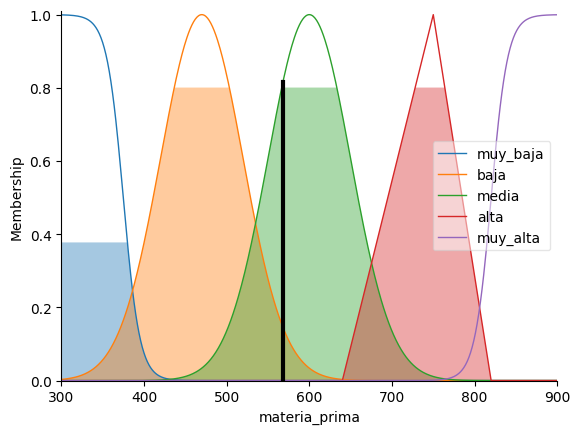

In [24]:
materia = ctrl.ControlSystemSimulation(materia_ctrl)
materia.input['demanda'] = 12
materia.input['tiempo_reabastecimiento'] = 28
materia.input['stock'] = 82

materia.compute()
print(materia.output['materia_prima'])
materia_prima.view(sim=materia)

#Error absoluto medio
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_true = 420
y_pred = materia.output['materia_prima']
mape(y_true, y_pred)